# Desafio **Indicium** – Cientista de Dados  – Análise Cinematográfica


# Entregas 
1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

2. Responda também às seguintes perguntas:
   1. Qual filme você recomendaria para uma pessoa que você não conhece?
   2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
   3. Quais insights podem ser tirados com a coluna *Overview?* É possível inferir o gênero do filme a partir dessa coluna?
3. Explique como você faria a previsão da **nota do imdb** a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
4. Supondo um filme com as seguintes características:

   {'Series\_Title': 'The Shawshank Redemption',
   'Released\_Year': '1994',
   'Certificate': 'A',
   'Runtime': '142 min',
   'Genre': 'Drama',
   'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
   'Meta\_score': 80.0,
   'Director': 'Frank Darabont',
   'Star1': 'Tim Robbins',
   'Star2': 'Morgan Freeman',
   'Star3': 'Bob Gunton',
   'Star4': 'William Sadler',
   'No\_of\_Votes': 2343110,
   'Gross': '28,341,469'}

Qual seria a nota do IMDB?

5. Salve o modelo desenvolvido no formato .pkl.
6. A entrega deve ser feita através de um repositório de código público que contenha:
   1. README explicando como instalar e executar o projeto
   2. Arquivo de requisitos com todos os pacotes utilizados e suas versões
   3. Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2\.
   4. Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
   5. Arquivo .pkl conforme passo 5 acima.

Todos os códigos produzidos devem seguir as boas práticas de codificação.

---
# Respostas
---


## Entrega 1. Análise Exploratória de Dados (EDA)

A análise exploratória dos dados (EDA) foi realizada para compreender as principais características do dataset e identificar padrões, relações e hipóteses para análises futuras ou modelagem preditiva.


### 1.0 Análise Univariada
- Avaliação individual de cada variável para entender distribuição, presença de valores ausentes e outliers.
- Principais ações:
  - Identificação de **valores ausentes** e proporção de NAs.
  - Contagem de **valores únicos** e frequência das categorias.
  - Determinação da **moda** para variáveis categóricas.
  - Análise de **média, mediana, skew e kurtosis** para variáveis numéricas.
- **Insight:** Nenhum diretor ou ator domina significativamente, indicando **alta diversidade/baixa concentração**.


### 1.1 Análise Bivariada
- Exploração das relações entre pares de variáveis.
- Principais técnicas:
  - **Numérica x Numérica:** scatter plot e correlação (ex.: Gross x IMDB_Rating).
  - **Numérica x Categórica:** boxplots ou ANOVA (ex.: IMDB_Rating por Certificate ou Genre).
  - **Categórica x Categórica:** tabelas de contingência e teste Qui-quadrado (ex.: elenco/diretor x faixas de IMDB_Rating).
- **Insight:** Alguns diretores e atores estão associados a notas médias mais altas; Gross apresenta correlação positiva com IMDB_Rating.


### 1.2 Análise Multivariada
- Avaliação de múltiplas variáveis simultaneamente para capturar interações complexas.
- Principais técnicas:
  - **Regressão múltipla** de IMDB_Rating considerando Gross, Runtime e Meta_score.
  - **Pairplots e heatmaps** para visualizar dependências entre variáveis.
  - Análise de interações entre elenco, gênero e métricas numéricas.
- **Insight:** Agrupamentos históricos (média de Gross ou nota por ator/diretor) podem gerar preditores robustos, sem causar data leakage.


### 1.3 Hipóteses geradas
- H_1: Existe associação entre elenco/diretores e filmes com notas mais altas.
- H_2: Variáveis financeiras, como Gross, têm correlação positiva com IMDB_Rating.
- H_3: Certas categorias de Genre ou Certificate podem influenciar a nota média.
- H_4: Estatísticas agregadas por histórico de atores/diretores podem ser boas preditoras.

---

## 2. Entrega 2

### 2.1 Sistema de Recomendação

Podemos construir um sistema de recomendação a partir da concatenação de todas as variáveis textuais disponíveis. A partir dessa variável consolidada, existem duas abordagens principais para representação dos textos:

1. **Embeddings**  
   - Capturam a semântica dos textos.  
   - Permitem identificar proximidade de significado, mesmo quando palavras diferentes são utilizadas.  

2. **Vetorização esparsa (TF-IDF)**  
   - Captura a relevância de termos com base em sua frequência.  
   - É mais eficaz para identificar correspondência exata de palavras.  
   - Requer pré-processamento, como:  
     - remoção de *stopwords*  
     - normalização  
     - lematização (opcional)  

Em ambos os casos, podemos calcular a similaridade entre dois filmes por meio do **cosseno do ângulo entre seus vetores** (*cosine similarity*).  
- Valores próximos de **1** indicam alta similaridade.  
- Valores próximos de **0** indicam ausência de relação (vetores ortogonais).  

Dessa forma, ao receber o título de um filme que o usuário já assistiu (desde que presente na base), é possível recomendar os **Top-5 filmes mais similares** de acordo com sua representação vetorial.


### 2.2 Hipótese de Expectativa de Faturamento

Com base nas análises exploratórias (correlações e testes de associação), identificamos alguns fatores relacionados à **alta expectativa de faturamento de um filme**:

- **Número de votos (No_of_Votes)**: apresentou correlação moderada e positiva (~0,6) com o faturamento.  
- **Avaliação IMDB (IMDB_Rating)**: possui relação positiva com o número de votos, o que indiretamente reforça sua conexão com o faturamento.  
- **Variáveis categóricas** como **Certificate, Genre, Diretor e Elenco** mostraram associação significativa (nível de 5%) com faixas de faturamento.  

Assim, formulamos a hipótese:

**H₁:** Filmes com maior número de votos, avaliações mais altas e pertencentes a determinados gêneros ou certificados têm maior probabilidade de alcançar faturamento elevado.

### 2.3. Insights a partir da coluna *Overview*

A coluna *Overview* contém descrições textuais dos filmes. Em tese, ela pode ser explorada para extrair informações sobre enredo, temática e estilo narrativo. Surge então a seguinte hipótese:

**H₃ (pendente):** É possível inferir o gênero do filme a partir da coluna *Overview*.  

No entanto, na análise preliminar, não encontramos um *match* direto entre o texto do *Overview* e o gênero declarado (*Genre*).  
Com apenas 1000 observações disponíveis, técnicas clássicas de bag-of-words podem não capturar as nuances semânticas necessárias.  

Duas abordagens mais promissoras seriam:  
- **Modelos pré-treinados de linguagem (ex.: BERT com *fine-tuning*)**, que captam relações semânticas profundas.  
- **Modelos de IA generativa**, que podem interpretar contexto narrativo para mapear em gêneros.  

Portanto, esta hipótese permanece em aberto e será explorada em etapas futuras.

---

### 3. Previsão da Nota do IMDB

**Tipo de problema:**  
Estamos lidando com um problema de **regressão supervisionada**, pois a variável-alvo (*IMDB_Rating*) é numérica e contínua.

**Variáveis consideradas:**  
- **Numéricas:**  
  - `Gross`, `No_of_Votes`, `Meta_score`, `Runtime`.  
  Essas variáveis são bons preditores porque apresentam correlação positiva (embora não perfeita) com a nota.  
  Transformações como *log(Gross)* podem ser aplicadas para reduzir a assimetria.  

- **Categóricas:**  
  - `Genre`, `Certificate`, `Director`, `Stars`.  
  Necessitam de *encoding*. Por exemplo:  
  - *Top-k encoding* para `Director` e `Stars` (para reduzir dimensionalidade).  
  - *One-hot encoding* ou *target encoding* para `Genre` e `Certificate`.  

- **Textuais:**  
  - `Overview`. Pode ser vetorizado via TF-IDF ou embeddings (BERT, por exemplo), mas dada a limitação de dados, começaria com TF-IDF para capturar frequência de termos relevantes.  

**Por que não regressão linear simples?**  
- Regressão linear exige relação linear entre as variáveis independentes e o alvo, além de normalidade dos resíduos e ausência de multicolinearidade.  
- Nossos dados não cumprem essas premissas: temos variáveis categóricas de alta cardinalidade, variáveis numéricas assimétricas e relações não lineares.  

**Modelos candidatos:**  
- **Árvores de decisão / Random Forest:**  
  - **Prós:** Lidam bem com variáveis categóricas (após encoding simples), não exigem normalização, capturam interações não lineares.  
  - **Contras:** Podem sobreajustar; menos interpretáveis.  

- **Gradient Boosting (ex.: XGBoost, LightGBM):**  
  - **Prós:** Melhor performance preditiva em geral, robusto para diferentes tipos de dados, captura bem relações complexas.  
  - **Contras:** Mais lento para treinar, mais difícil de interpretar.  

- **Modelos lineares regulares (Ridge, Lasso):**  
  - **Prós:** Boa interpretabilidade, podem servir como baseline.  
  - **Contras:** Não capturam não-linearidades de forma adequada.  

**Medida de performance escolhida:**  
- **RMSE (Root Mean Squared Error):** penaliza mais erros grandes, útil pois queremos evitar previsões muito distantes da nota real.  
- **R²:** mede a proporção da variância explicada, útil para comunicar a qualidade geral do ajuste.  

**Conclusão preliminar:**  
O modelo que melhor se adapta ao problema é um **ensemble baseado em boosting (como Gradient Boosting ou LightGBM)**, pois equilibra viés e variância e lida bem com dados heterogêneos. A regressão linear pode ser usada como baseline, mas não é adequada como modelo final.

--- 

### 4 Entrega 

Previsão de IMDB Rating: 8.97

---

### 5 Entrega feito 



# Imports

In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent       
sys.path.append(str(project_root / "src"))      
from functions import *  # Vide src/functions.py 

# Lendo CSV principal

In [10]:
# Dados do desafio 
raw_df_0  =  pd.read_csv(DATA_DIR / "desafio_indicium_imdb.csv").drop(columns= ["Unnamed: 0"], errors= "ignore")
raw_df = raw_df_0.copy() #Cópia de restauração 


In [11]:
raw_df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


# Informações Gerais do Dataset

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


# Padronizações Globais (Sem Data Leakage)

## Convertendo Released_Year, Gross e Runtime para numérico


In [13]:
# =========================================
# Convertendo Released_Year, Gross e Runtime para numérico
# =========================================

raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'].str.strip(), errors='coerce').astype('Int64')

# Gross para float 
raw_df['Gross'] = (
    raw_df['Gross']
    .str.replace(r'[^0-9.]', '', regex=True)  
    .replace('', pd.NA)                        
    .astype('float')
)

# Runtime para minutos como inteiro (assumindo formato "123 min")
raw_df['Runtime'] = (
    raw_df['Runtime']
    .str.extract(r'(\d+)')  
    .astype('Int64')         # converte para inteiro com suporte a NaN
)


## Conversão de Colunas Não Numéricas para String

In [14]:
for col in raw_df.select_dtypes(include=['object']).columns:
    raw_df[col] = raw_df[col].astype('string')

## Criando uma nova coluna: Faixa de IMDB_Rating

> A criação desta coluna será útil para analisar a associação entre variáveis **qualitativas** (como elenco e diretores) e o **target**, transformado de contínuo para categórico.  
> A hipótese é que **exista uma associação significativa** entre certos diretores ou atores e filmes com IMDB_Rating mais alto, podendo ser avaliada via **teste Qui-quadrado**.


In [15]:
# Definindo bins e labels
#bins = [0, 5, 6, 7, 8, 9, 10]  # ajustar conforme a distribuição desejada
#labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto', 'Excelente']
#Abordabem via quantiles
quantiles = raw_df['IMDB_Rating'].quantile([0, 0.25, 0.5, 0.75, 1])
labels     =  ['Baixa','Média-baixa','Média-alta','Alta'] 
raw_df['IMDB_Rating_Faixa'] = pd.cut(raw_df['IMDB_Rating'], bins=quantiles, labels=labels, include_lowest=True)

raw_df[['IMDB_Rating', 'IMDB_Rating_Faixa']].head()

,IMDB_Rating,IMDB_Rating_Faixa
0,9.2,Alta
1,9.0,Alta
2,9.0,Alta
3,9.0,Alta
4,8.9,Alta


In [16]:
raw_df[['IMDB_Rating', 'IMDB_Rating_Faixa']].sample(10)

,IMDB_Rating,IMDB_Rating_Faixa
251,8.1,Média-alta
657,7.8,Média-baixa
427,8.0,Média-alta
619,7.8,Média-baixa
273,8.1,Média-alta
150,8.2,Alta
718,7.8,Média-baixa
596,7.8,Média-baixa
412,8.0,Média-alta
195,8.1,Média-alta


In [17]:
raw_df['IMDB_Rating_Faixa'].value_counts()

IMDB_Rating_Faixa
Baixa          280
Média-alta     268
Média-baixa    257
Alta           194
Name: count, dtype: int64

## Criando uma nova coluna: Faixa de Gross 

In [18]:
print(raw_df['Gross'].min(), raw_df['Gross'].max())

# Criar quartis
quartiles_gross = raw_df['Gross'].quantile([0, 0.25, 0.5, 0.75, 1])

labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

raw_df['Gross_Faixa'] = pd.cut(
    raw_df['Gross'],
    bins=quartiles_gross,
    labels=labels,
    include_lowest=True
)

raw_df[['Gross', 'Gross_Faixa']].dropna().sample(10)


1305.0 936662225.0


,Gross,Gross_Faixa
233,100492203.0,Muito Alto
25,57598247.0,Alto
785,4064200.0,Médio
416,86300000.0,Muito Alto
674,118500000.0,Muito Alto
987,132088635.0,Muito Alto
474,349555.0,Baixo
913,209028679.0,Muito Alto
490,25379975.0,Alto
30,269061.0,Baixo


In [19]:
raw_df['Gross_Faixa'].value_counts()

Gross_Faixa
Baixo         208
Muito Alto    208
Médio         207
Alto          207
Name: count, dtype: int64

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Series_Title       999 non-null    string  
 1   Released_Year      998 non-null    Int64   
 2   Certificate        898 non-null    string  
 3   Runtime            999 non-null    Int64   
 4   Genre              999 non-null    string  
 5   IMDB_Rating        999 non-null    float64 
 6   Overview           999 non-null    string  
 7   Meta_score         842 non-null    float64 
 8   Director           999 non-null    string  
 9   Star1              999 non-null    string  
 10  Star2              999 non-null    string  
 11  Star3              999 non-null    string  
 12  Star4              999 non-null    string  
 13  No_of_Votes        999 non-null    int64   
 14  Gross              830 non-null    float64 
 15  IMDB_Rating_Faixa  999 non-null    category
 16  Gross_Fa

In [21]:
raw_df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDB_Rating_Faixa,Gross_Faixa
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Alta,Muito Alto
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Alta,Muito Alto


In [22]:
cross_tab = pd.crosstab(raw_df['IMDB_Rating_Faixa'], raw_df['Gross_Faixa'])
cross_tab

Gross_Faixa,Baixo,Médio,Alto,Muito Alto
IMDB_Rating_Faixa,,,,
Baixa,47,61,78,59
Média-baixa,53,56,55,47
Média-alta,67,50,44,51
Alta,41,40,30,51


### Criando Pipeline 
##### Criando pipeline com as transformações iniciais. 

In [23]:
# Sintetizando as transforações 

def normalize_text(df):
    df = df.copy()
    for col in ['Director', 'Overview']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().apply(unidecode)
    return df

def convert_types(df):
    df = df.copy()
    df['Released_Year'] = pd.to_numeric(df['Released_Year'].str.strip(), errors='coerce').astype('Int64')
    df['Gross'] = (df['Gross'].str.replace(r'[^0-9.]', '', regex=True)
                          .replace('', pd.NA).astype('float'))
    df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype('Int64')
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('string')
    return df

def create_bins(df):
    df = df.copy()
    if 'IMDB_Rating' in df.columns:
        quantiles_rating = df['IMDB_Rating'].quantile([0,0.25,0.5,0.75,1])
        df['IMDB_Rating_Faixa'] = pd.cut(
            df['IMDB_Rating'], bins=quantiles_rating,
            labels=['Baixa','Média-baixa','Média-alta','Alta'],
            include_lowest=True
        )
    if 'Gross' in df.columns:
        quantiles_gross = df['Gross'].quantile([0,0.25,0.5,0.75,1])
        df['Gross_Faixa'] = pd.cut(
            df['Gross'], bins=quantiles_gross,
            labels=['Baixo','Médio','Alto','Muito Alto'],
            include_lowest=True
        )
    return df

pipeline_0 = [
    convert_types,
    normalize_text,
]

preprocessor_0 = FunctionPipelineTransformer(pipeline_0)


In [24]:
#Usando Pipeline 
raw_df_pipe = preprocessor_0.transform(raw_df_0)
raw_df_pipe.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,an organized crime dynasty's aging patriarch t...,100.0,francis ford coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,when the menace known as the joker wreaks havo...,84.0,christopher nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


# EDA 
## Análise Univariada

Nesta etapa, analisamos cada variável individualmente para entender sua **distribuição, presença de valores ausentes, outliers e características gerais**.


In [25]:
raw_df_info = summarize_dataframe(raw_df)  # Ver função definida em src/functions.py

### Informações Gerais 

In [18]:
raw_df_info['info']

,Num NAs,Percent NAs,Num unique,Data Type
Series_Title,0,0.00,998,string[python]
Released_Year,1,0.10,99,Int64
Certificate,101,10.11,16,string[python]
Runtime,0,0.00,140,Int64
Genre,0,0.00,202,string[python]
IMDB_Rating,0,0.00,16,float64
Overview,0,0.00,999,string[python]
Meta_score,157,15.72,63,float64
Director,0,0.00,548,string[python]
Star1,0,0.00,659,string[python]


### Informações estatísticas descritivas para colunas numéricas

In [26]:
raw_df_info['numeric_stats']

,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis,outliers_count,outliers_percent
0,Released_Year,1991.214429,1999.0,23.308539,33.0,1920.0,2020.0,100.0,-0.93854,-0.024782,7,0.7
1,Runtime,122.871872,119.0,28.101227,34.0,45.0,321.0,276.0,1.209877,3.428907,29,2.9
2,IMDB_Rating,7.947948,7.9,0.27229,0.4,7.6,9.2,1.6,0.946693,1.058397,12,1.2
3,Meta_score,77.969121,79.0,12.383257,17.0,28.0,100.0,72.0,-0.604316,0.416517,7,0.7
4,No_of_Votes,271621.422422,138356.0,320912.621055,317696.0,25088.0,2303232.0,2278144.0,2.194351,6.041324,66,6.61
5,Gross,68082574.104819,23457439.5,109807553.385723,77631001.75,1305.0,936662225.0,936660920.0,3.127745,13.894054,88,8.81


### Conclusão

Observando as estatísticas descritivas:

- **Todas as variáveis numéricas possuem outliers.**  
- **Média e mediana** estão próximas para a maioria das variáveis, **exceto `No_of_Votes` e `Gross`**, que apresentam divergência significativa.  
- Nenhuma variável apresenta **simultaneamente kurtosis próxima de 3 e skew próximo de 0**, indicando que **nenhuma segue distribuição normal**.  
- As variáveis com média próxima da mediana têm **proporção de outliers menor**, enquanto `No_of_Votes` e `Gross` apresentam:
  - `No_of_Votes`: skew > 2, kurtosis > 6, ~6% de outliers  
  - `Gross`: skew ≈ 3.13, kurtosis ≈ 13.89, ~9% de outliers  

> Em resumo, mesmo variáveis com média próxima da mediana têm alguma assimetria, mas as exceções (`No_of_Votes` e `Gross`) mostram forte não normalidade e maior quantidade de outliers.

### Informações estatísticas descritivas para colunas qualitativas 

In [27]:
raw_df_info['categorical_stats']

,attribute,top,top_freq,top_percent
0,Series_Title,Drishyam,2,0.20
1,Certificate,U,234,26.06
2,Genre,Drama,84,8.41
3,Overview,"""Documentary"" about a man who can look and act...",1,0.10
4,Director,Alfred Hitchcock,14,1.40
5,Star1,Tom Hanks,12,1.20
6,Star2,Emma Watson,7,0.70
7,Star3,Rupert Grint,5,0.50
8,Star4,Michael Caine,4,0.40
9,IMDB_Rating_Faixa,Baixa,280,28.03


### Resumo do Dataset

#### 1 Valores ausentes (NAs)

| Variável       | NAs  | %      |
|----------------|------|--------|
| Released_Year  | 1    | 0.1%   |
| Certificate    | 101  | 10.11% |
| Meta_score     | 157  | 15.72% |
| Gross          | 169  | 16.92% |

> Observação: Apenas `Released_Year` tem NA desprezível. `Certificate`, `Meta_score` e `Gross` podem requerer imputação ou tratamento específico.

---

#### 2 Número de valores únicos

| Variável        | Unique |
|-----------------|--------|
| Released_Year   | 99     |
| Certificate     | 16     |
| Runtime         | 140    |
| Genre           | 202    |
| IMDB_Rating     | 16     |
| Meta_score      | 63     |
| Director        | 548    |
| Star1           | 659    |
| Star2           | 840    |
| Star3           | 890    |
| Star4           | 938    |

> Observação: Variáveis de alta cardinalidade (`Director` e elenco) podem exigir encoding especial ou agregações.

---

#### 3 Moda (valor mais frequente)

| Variável | Valor mais frequente | Frequência | %    |
|----------|-------------------|------------|------|
| Genre    | Drama             | 84         | 8.41%|
| Director | Alfred Hitchcock  | 14         | 1.40%|
| Star1    | Tom Hanks         | 12         | 1.20%|
| Star2    | Emma Watson       | 7          | 0.70%|
| Star3    | Rupert Grint      | 5          | 0.50%|
| Star4    | Michael Caine     | 4          | 0.40%|

> Observação: Nenhuma categoria domina significativamente, indicando alta dispersão (ou seja, alta diversidade ou baixa concentração) nos dados de diretor e elenco.

---

#### 4 Variáveis numéricas

- Todas possuem **outliers**.  
- Média próxima da mediana para todas, **exceto `No_of_Votes` e `Gross`**.  
- Nenhuma variável apresenta simultaneamente **kurtosis ≈ 3** e **skew ≈ 0**, ou seja, não há forte evidência de normalidade.

> Observação: Modelos que assumem normalidade podem exigir **transformações logarítmicas ou Box-Cox**.

---

#### 5 Observações e recomendações

1. **Valores ausentes:**  
   - `Gross` e `Meta_score`: considerar imputação pela mediana ou modelo.  
   - `Certificate`: criar categoria "Unknown" ou similar.
2. **Variáveis categóricas de alta cardinalidade:**  
   - Usar agregações  
   - Target encoding ou encoding baseado em frequência.
3. **Outliers em variáveis numéricas:**  
   - Avaliar remoção ou transformação (log, winsorize).  
4. **Distribuição:**  
   - Transformar variáveis com skew alto para atender modelos lineares.

##  Distribuições e Box Plot

### Variaveis numericas 
#### IMDB_Rating (Target) 

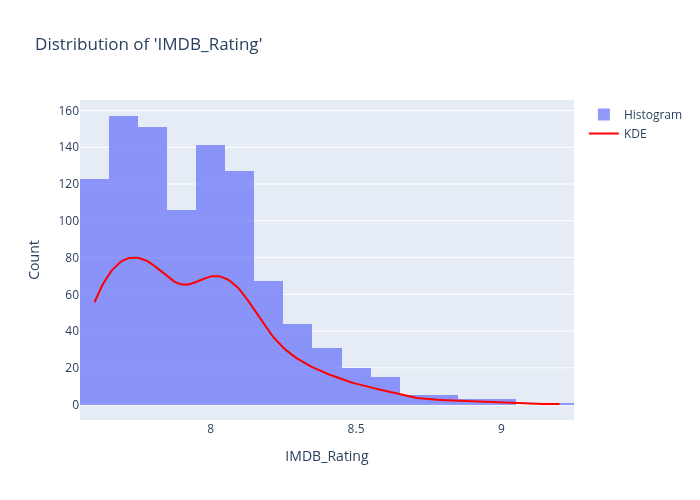

In [28]:
#Distribuição de IMDB_Rating
plot_distribution(raw_df, col_name = 'IMDB_Rating')

Column: IMDB_Rating
Number of outliers: 12
Percentage of outliers: 1.20%


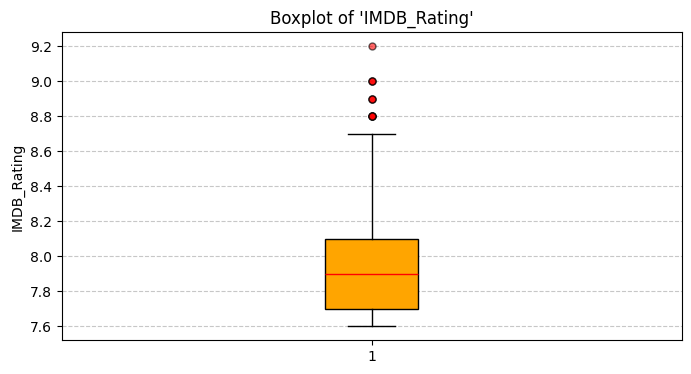

In [29]:
# Box Plot de IMDB_Rating
plot_boxplot_stats(raw_df, col_name = 'IMDB_Rating')

#### Released_Year  Numerica (quantitativa discreta)

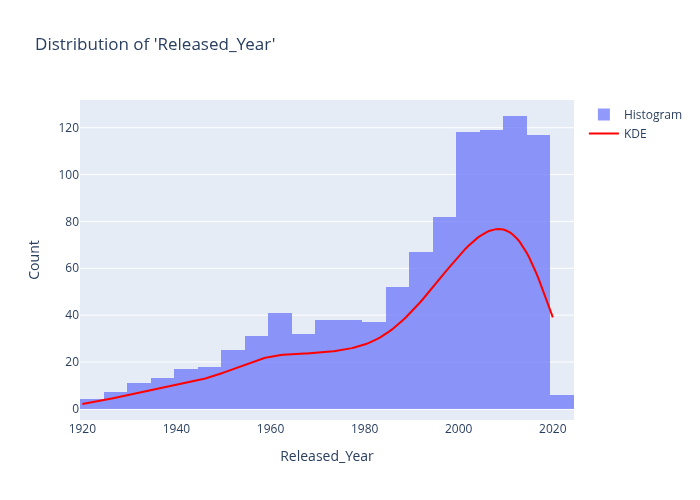

In [30]:
#Distribuição de Released_Year
plot_distribution(raw_df, col_name = 'Released_Year')

Column: Released_Year
Number of outliers: 7
Percentage of outliers: 0.70%


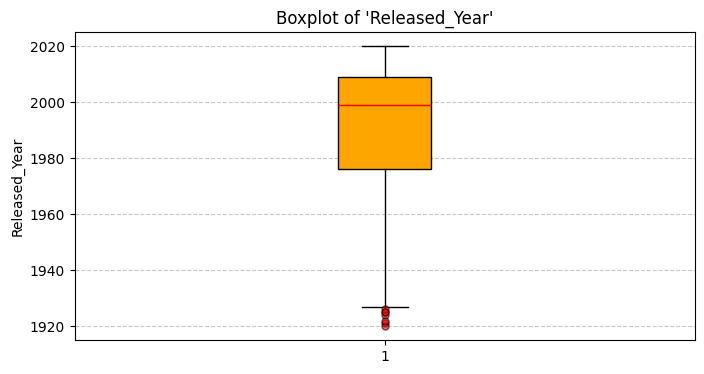

In [31]:
# Box Plot de Released_Year
plot_boxplot_stats(raw_df, col_name = 'Released_Year')

#### Runtime  Numerica (quantitativa continua)

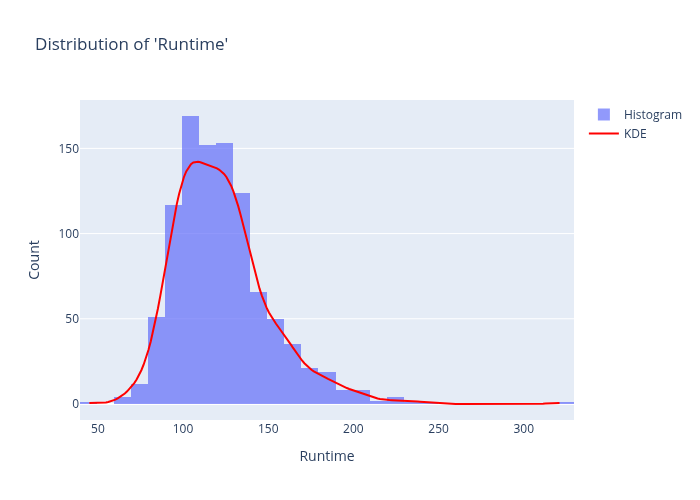

In [32]:
#Distribuição de Runtime
plot_distribution(raw_df, col_name = 'Runtime')

Column: Runtime
Number of outliers: 29
Percentage of outliers: 2.90%


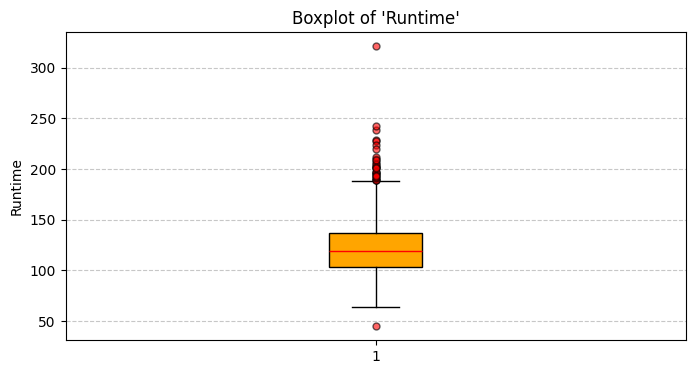

In [33]:
# Box Plot de Runtime
plot_boxplot_stats(raw_df, col_name = 'Runtime')

#### Meta_score  Numerica (quantitativa continua)

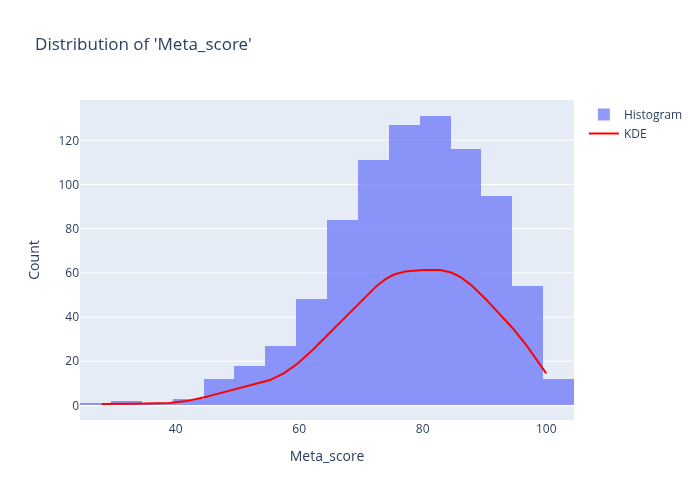

In [34]:
#Distribuição de Meta_score
plot_distribution(raw_df, col_name = 'Meta_score')

Column: Meta_score
Number of outliers: 7
Percentage of outliers: 0.83%


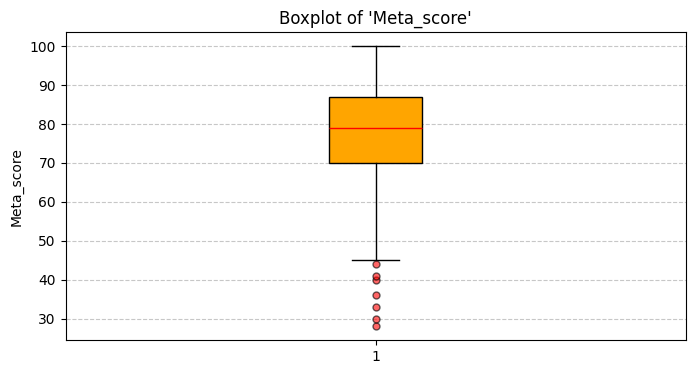

In [35]:
# Box Plot de Meta_score
plot_boxplot_stats(raw_df, col_name = 'Meta_score')

#### No_of_Votes  Numerica (quantitativa discreta)

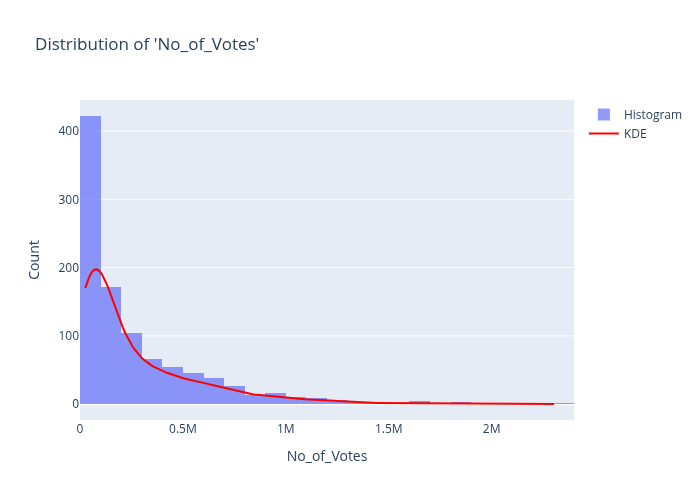

In [36]:
#Distribuição de No_of_Votes
plot_distribution(raw_df, col_name = 'No_of_Votes')

Column: No_of_Votes
Number of outliers: 66
Percentage of outliers: 6.61%


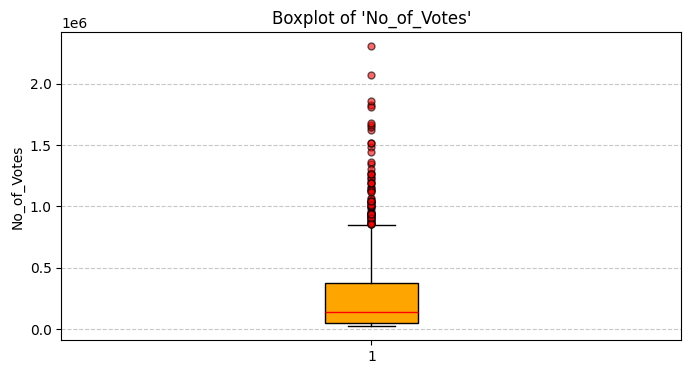

In [37]:
# Box Plot de No_of_Votes
plot_boxplot_stats(raw_df, col_name = 'No_of_Votes')

#### Gross Numerica (quantitativa continua)

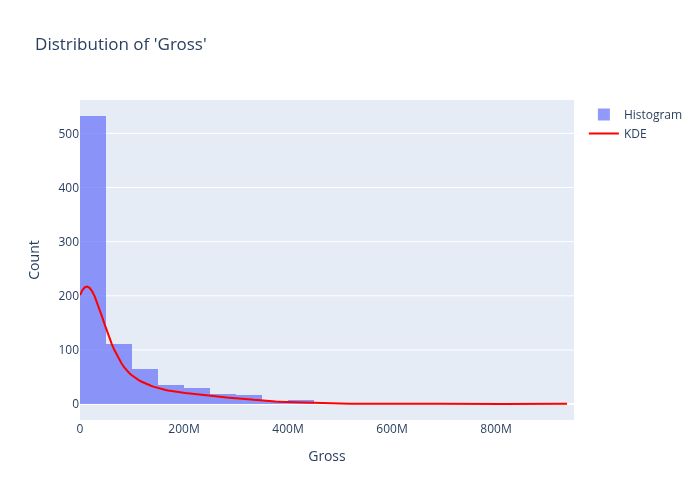

In [38]:
#Distribuição de Gross
plot_distribution(raw_df, col_name = 'Gross')

Column: Gross
Number of outliers: 88
Percentage of outliers: 10.60%


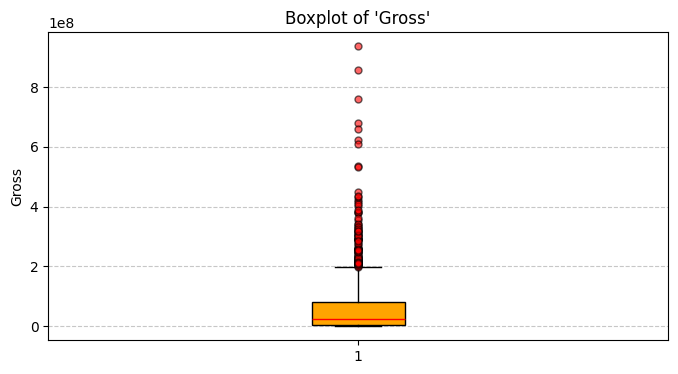

In [39]:
# Box Plot de Gross
plot_boxplot_stats(raw_df, col_name = 'Gross')

### Variáveis Categóricas

### Top 10 Genres

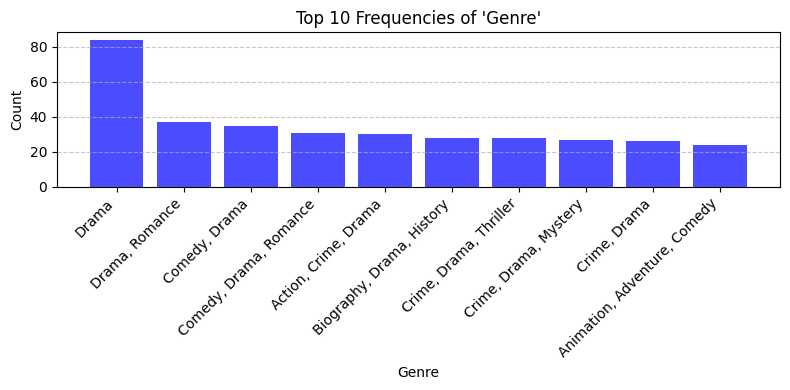

In [40]:
plot_top_frequencies(raw_df,col_name= 'Genre', top_k=10)

### Top 10 Certificate

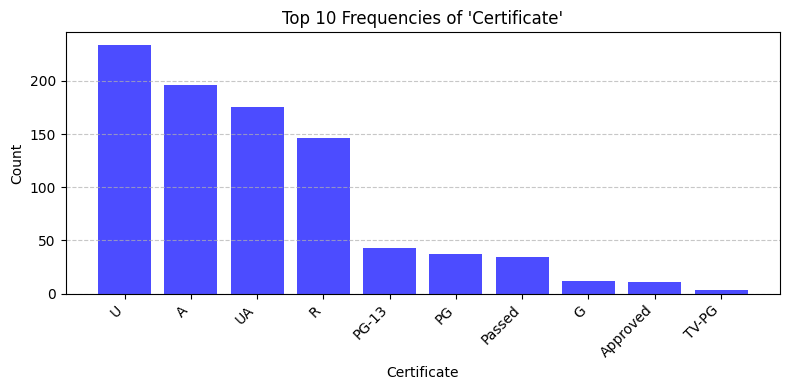

In [41]:
plot_top_frequencies(raw_df,col_name= 'Certificate', top_k=10)

### Top 20 Directors e Star1, Star2, Star3, Star4 

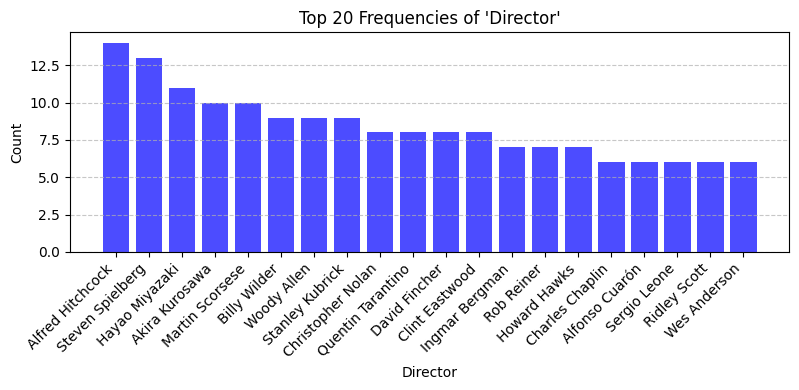

In [42]:
plot_top_frequencies(raw_df,col_name= 'Director', top_k=20)

Top 20 Star1


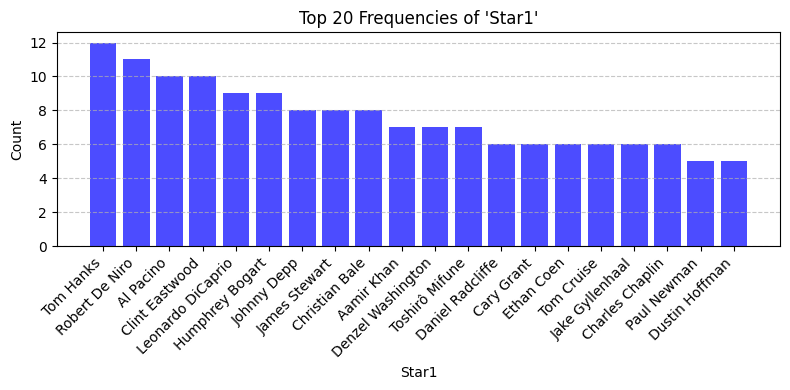

Top 20 Star2


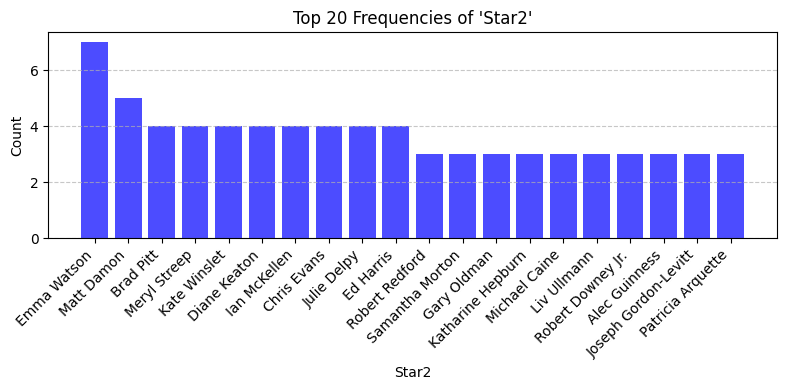

Top 20 Star3


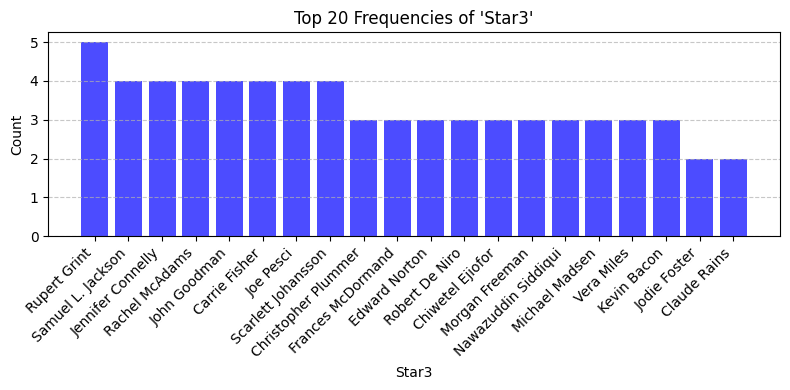

Top 20 Star4


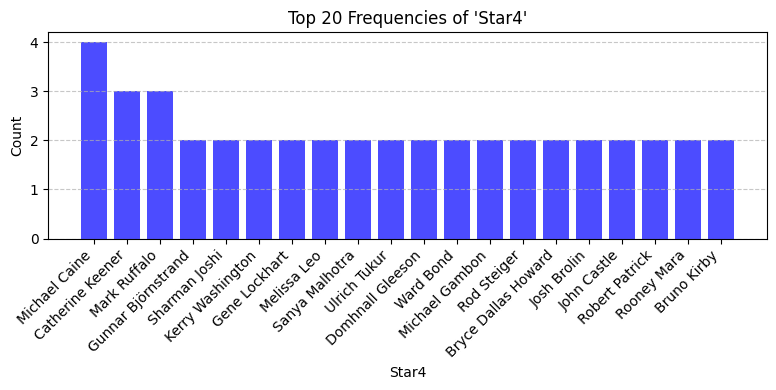

In [43]:
for i in range(1,5):
    col_name = 'Star' + str(i)
    print("Top 20 " + col_name )
    plot_top_frequencies(raw_df,col_name = col_name, top_k=20)

## Análise Bivariada e Multivariada

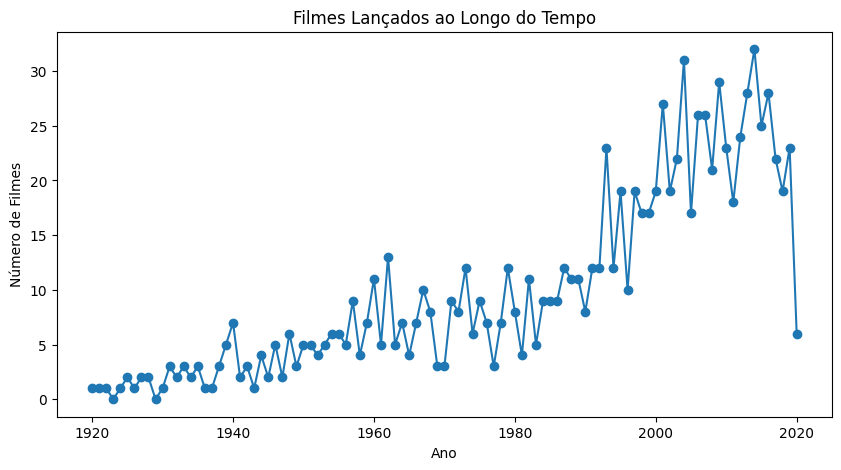

In [39]:
# Movies Released Over Time
raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'], errors='coerce')
year_counts = raw_df['Released_Year'].value_counts().sort_index()
all_years = pd.Series(0, index=range(int(raw_df['Released_Year'].min()), int(raw_df['Released_Year'].max())+1))
year_counts = all_years.add(year_counts, fill_value=0)
# plot
plt.figure(figsize=(10,5))
year_counts.plot(kind="line", marker='o')
plt.title("Filmes Lançados ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Número de Filmes")
plt.show()

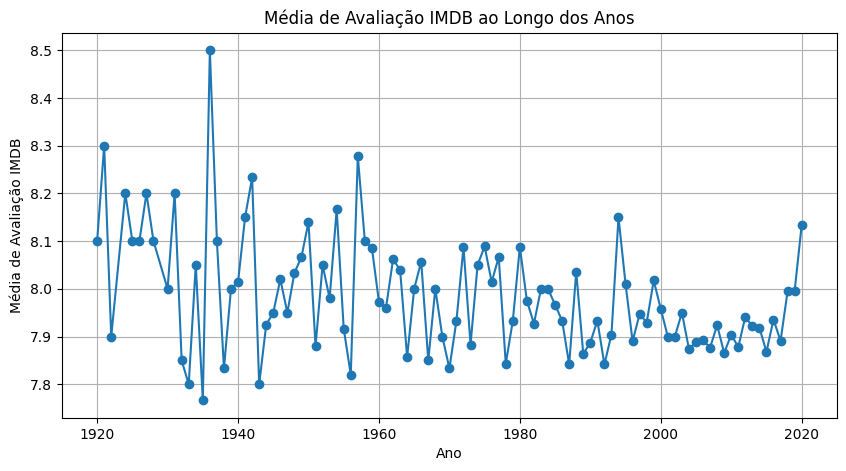

In [40]:
raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'], errors='coerce')
avg_rating = raw_df.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()
avg_rating = avg_rating.sort_values("Released_Year")
plt.figure(figsize=(10,5))
plt.plot(avg_rating['Released_Year'], avg_rating['IMDB_Rating'], marker='o', linestyle='-')
plt.title("Média de Avaliação IMDB ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Média de Avaliação IMDB")
plt.grid(True)
plt.show()

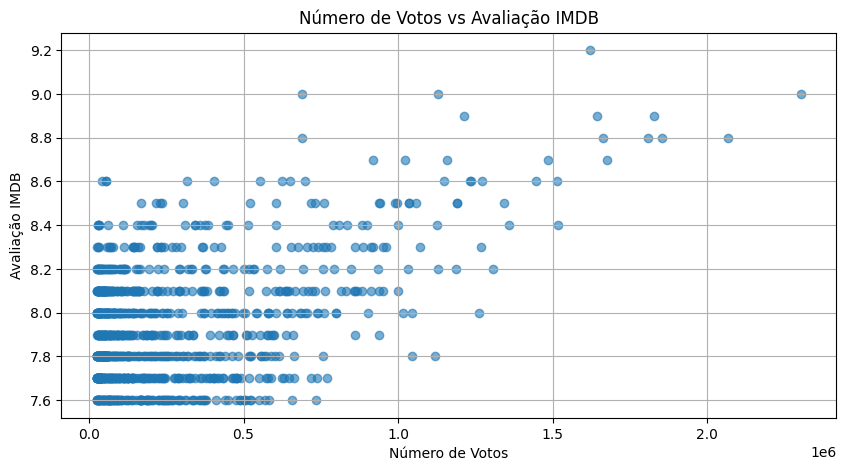

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(raw_df['No_of_Votes'], raw_df['IMDB_Rating'], alpha=0.6)
plt.title("Número de Votos vs Avaliação IMDB")
plt.xlabel("Número de Votos")
plt.ylabel("Avaliação IMDB")
plt.grid(True)
plt.show()

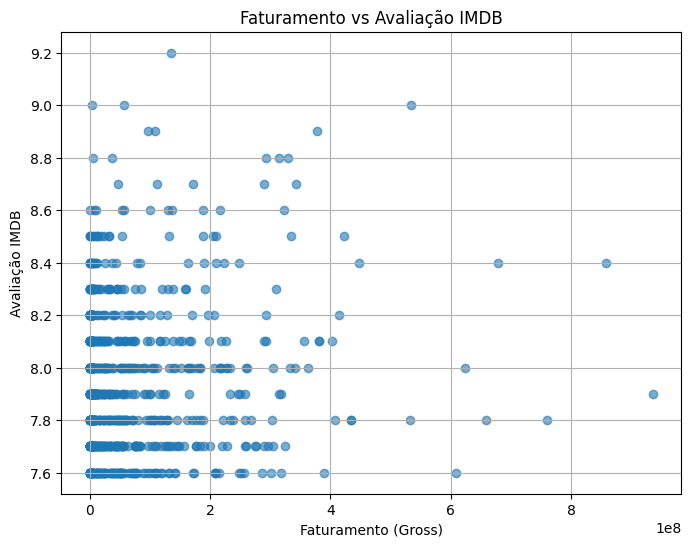

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(raw_df['Gross'], raw_df['IMDB_Rating'], alpha=0.6)
plt.title("Faturamento vs Avaliação IMDB")
plt.xlabel("Faturamento (Gross)")
plt.ylabel("Avaliação IMDB")
plt.grid(True)
plt.show()

### Correlação entre variáveis quantitativas

In [44]:
plot_numeric_correlation(raw_df)

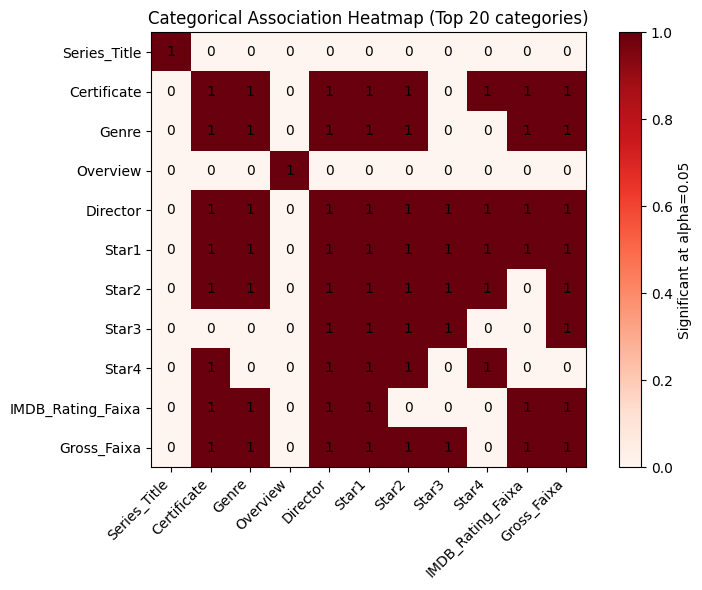

In [45]:
plot_categorical_association(raw_df, alpha= 0.05, top_k = 20)

###  Hipóteses 

- H1: Filmes dirigidos por certos diretores ou com determinados atores tendem a ter notas mais altas no IMDB.  
  Observação: Pode ser testado com estatísticas agregadas por diretor e elenco.

- H2: Filmes com maior faturamento (*Gross*) têm correlação positiva com IMDB Rating.  
  Observação: Correlação moderada já observada; pode ser confirmada com análise estatística.

- H3: O número de votos (*No_of_Votes*) está positivamente relacionado com a nota do IMDB.  
  Observação: Correlação baixa-moderada observada; hipótese parcialmente confirmada.

- H4: O ano de lançamento influencia a quantidade de filmes produzidos.  
  Observação: A maioria dos filmes foi produzida entre 2000 e 2019, com pico entre 2010 e 2014. Houve queda em 2020, possivelmente devido à pandemia.

- H5: O tempo de duração (*Runtime*) dos filmes tende a se concentrar em um intervalo específico.  
  Observação: A maioria dos filmes tem duração entre 100 e 130 minutos.

- H6: Certos gêneros ou certificados podem influenciar a nota média dos filmes.  
  Observação: Pode ser analisado com teste de qui-quadrado ou ANOVA.


### Engenharia de Features 

Nesta etapa, aplicamos transformações importantes para preparar os dados para modelagem. Entre elas:

Box-Cox (log generalizado): utilizado para reduzir assimetria e aproximar a distribuição das variáveis numéricas da normalidade, melhorando o desempenho de modelos lineares.

Tratamento de valores faltantes (NaNs): preenchimento de colunas numéricas com a mediana e colunas categóricas com uma categoria “Unknown”.

Criação de faixas (bins): agrupamento de variáveis contínuas em categorias discretas, como faixas de notas (IMDB_Rating) ou faturamento (Gross), permitindo análise e agregação mais intuitiva.

Normalização de texto: padronização de colunas de string (Director, Overview) com strip, lower e unidecode, para facilitar correspondência e comparações.

Escalonamento robusto (RobustScaler): aplicação de escalonamento robusto em variáveis numéricas transformadas para reduzir impacto de outliers.

### Definindo Transformações 


In [46]:
#Definindo Transformações 

def fill_numeric(df, numeric_cols):
    df = df.copy()
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    return df

def fill_categorical(df, categorical_cols):
    df = df.copy()
    for col in categorical_cols:
        df[col] = df[col].fillna('Unknown')
    return df

def boxcox_transform(df, numeric_cols):
    df = df.copy()
    for col in numeric_cols:
        shifted = df[col] + 1e-6
        df[col + '_boxcox'], _ = boxcox(shifted)
    return df

def robust_scale(df, numeric_cols, numeric_for_boxcox):
    df = df.copy()
    scaler = RobustScaler()
    scaled_cols = []

    for col in numeric_cols:
        if col in numeric_for_boxcox:
            source_col = col + '_boxcox'  # usa coluna transformada
        else:
            source_col = col  # usa coluna original
        df[col + '_scaled'] = scaler.fit_transform(df[[source_col]])
        scaled_cols.append(col + '_scaled')

    return df

numeric_cols = ['']
categorical_cols = ['']
target = ''

pipeline_1 = [
    lambda df: fill_numeric(df, numeric_cols),
    lambda df: fill_categorical(df, categorical_cols),
    lambda df: boxcox_transform(df, numeric_cols),
    lambda df: robust_scale(df, numeric_cols)
]

preprocessor_1 = FunctionPipelineTransformer(pipeline_1)



### Definindo variáveis para transformações

In [47]:
numeric_for_boxcox = ['Gross', 'No_of_Votes']
numeric_cols = ['Released_Year', 'Gross', 'Runtime', 'Meta_score', 'No_of_Votes']
categorical_cols = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 
                    'IMDB_Rating_Faixa', 'Gross_Faixa']
target_col = 'IMDB_Rating'

### Definindo o segundo Pipeline 

In [48]:
def fill_categorical(df, categorical_cols):
    df = df.copy()
    for col in categorical_cols:
        if isinstance(df[col].dtype, pd.CategoricalDtype):
            if 'Unknown' not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories('Unknown')
        df[col] = df[col].fillna('Unknown')
    return df

pipeline_1 = [
    lambda df: fill_numeric(df, numeric_cols),
    lambda df: fill_categorical(df, categorical_cols),
    lambda df: boxcox_transform(df, numeric_for_boxcox),
    lambda df: robust_scale(df, numeric_cols, numeric_for_boxcox)
]
preprocessor_1 = FunctionPipelineTransformer(pipeline_1)


In [49]:
df_transformed = preprocessor_1.transform(raw_df)
df_transformed.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Gross,IMDB_Rating_Faixa,Gross_Faixa,Gross_boxcox,No_of_Votes_boxcox,Released_Year_scaled,Gross_scaled,Runtime_scaled,Meta_score_scaled,No_of_Votes_scaled
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,134966411.0,Alta,Muito Alto,136.809756,6.798163,-0.818182,0.847377,1.647059,1.555556,1.119193
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,534858444.0,Alta,Muito Alto,174.559334,6.859163,0.272727,1.716623,0.970588,0.370370,1.253627
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,...,57300000.0,Alta,Alto,117.421976,6.732880,-0.757576,0.400941,2.441176,0.814815,0.975320
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,...,4360000.0,Alta,Médio,73.605955,6.638766,-1.272727,-0.607995,-0.676471,1.259259,0.767909
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,...,377845905.0,Alta,Muito Alto,164.180799,6.800593,0.121212,1.477640,2.411765,1.111111,1.124548


In [50]:
df_transformed_info = summarize_dataframe(df_transformed)

In [51]:
df_transformed_info['info']

,Num NAs,Percent NAs,Num unique,Data Type
Series_Title,0,0.0,998,string[python]
Released_Year,0,0.0,99,Int64
Certificate,0,0.0,17,string[python]
Runtime,0,0.0,140,Int64
Genre,0,0.0,202,string[python]
IMDB_Rating,0,0.0,16,float64
Overview,0,0.0,999,string[python]
Meta_score,0,0.0,63,float64
Director,0,0.0,548,string[python]
Star1,0,0.0,659,string[python]


In [52]:
df_transformed_info['numeric_stats']

,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis,outliers_count,outliers_percent
0,Released_Year,1991.222222,1999.0,23.29816,33.0,1920.0,2020.0,100.0,-0.939819,-0.021191,7,0.7
1,Runtime,122.871872,119.0,28.101227,34.0,45.0,321.0,276.0,1.209877,3.428907,29,2.9
2,IMDB_Rating,7.947948,7.9,0.27229,0.4,7.6,9.2,1.6,0.946693,1.058397,12,1.2
3,Meta_score,78.131131,79.0,11.373766,13.5,28.0,100.0,72.0,-0.699694,1.083421,25,2.5
4,No_of_Votes,271621.422422,138356.0,320912.621055,317696.0,25088.0,2303232.0,2278144.0,2.194351,6.041324,66,6.61
5,Gross,60533377.15966,23457439.5,101469394.533035,56564726.0,1305.0,936662225.0,936660920.0,3.500938,17.245016,124,12.41
6,Gross_boxcox,98.39869,100.00993,33.521842,43.427936,14.062576,192.643841,178.581265,-0.055542,-0.307908,3,0.3
7,No_of_Votes_boxcox,6.288397,6.290323,0.262592,0.453756,5.837686,6.859163,1.021478,0.052424,-1.159897,0,0.0
8,Released_Year_scaled,-0.23569,0.0,0.706005,1.0,-2.393939,0.636364,3.030303,-0.939819,-0.021191,7,0.7
9,Gross_scaled,-0.037101,0.0,0.771896,1.0,-1.97908,2.133049,4.112129,-0.055542,-0.307908,3,0.3


In [52]:
df_transformed_info['categorical_stats']

,attribute,top,top_freq,top_percent
0,Series_Title,Drishyam,2,0.20
1,Certificate,U,234,23.42
2,Genre,Drama,84,8.41
3,Overview,"""Documentary"" about a man who can look and act...",1,0.10
4,Director,Alfred Hitchcock,14,1.40
5,Star1,Tom Hanks,12,1.20
6,Star2,Emma Watson,7,0.70
7,Star3,Rupert Grint,5,0.50
8,Star4,Michael Caine,4,0.40
9,IMDB_Rating_Faixa,Baixa,280,28.03


### Distribuição de Gross vs Box-Cox Gross vs Robusto Scaled Gross 

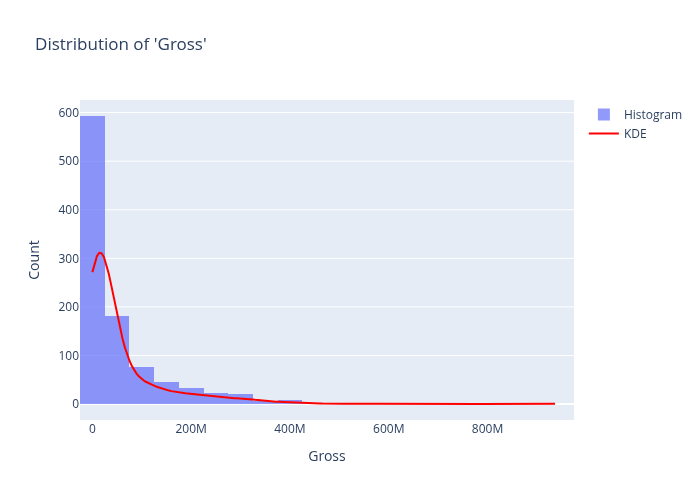

In [53]:
plot_distribution(df_transformed, 'Gross')

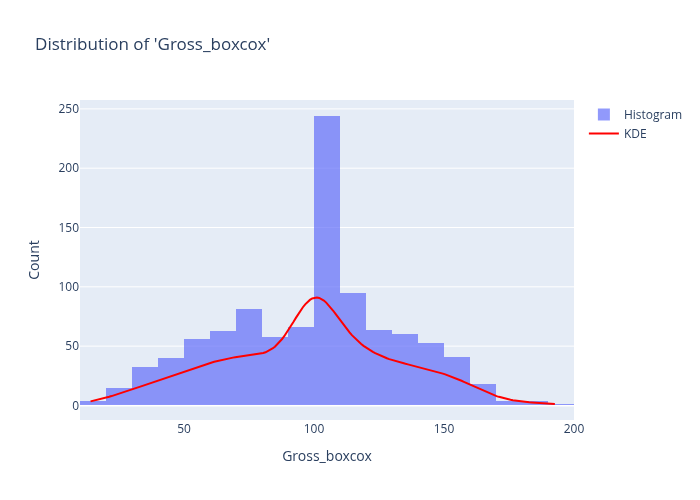

In [54]:
plot_distribution(df_transformed, 'Gross_boxcox')

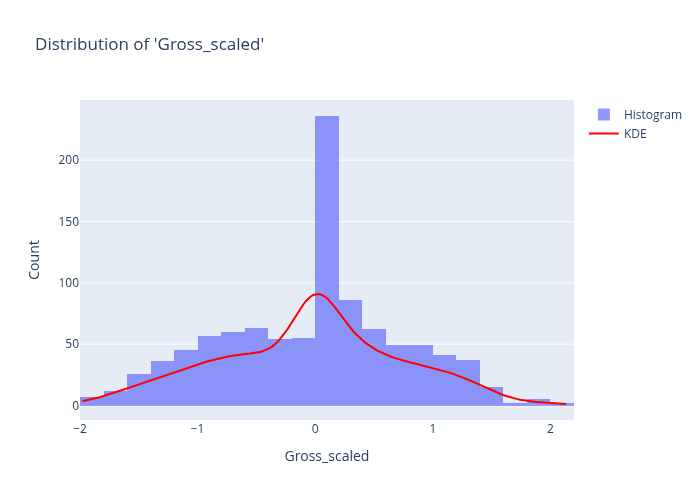

In [55]:
plot_distribution(df_transformed, 'Gross_scaled')

### Distribuição de No_of_Votes vs Box-Cox No_of_Votes vs Robusto Scaled No_of_Votes 

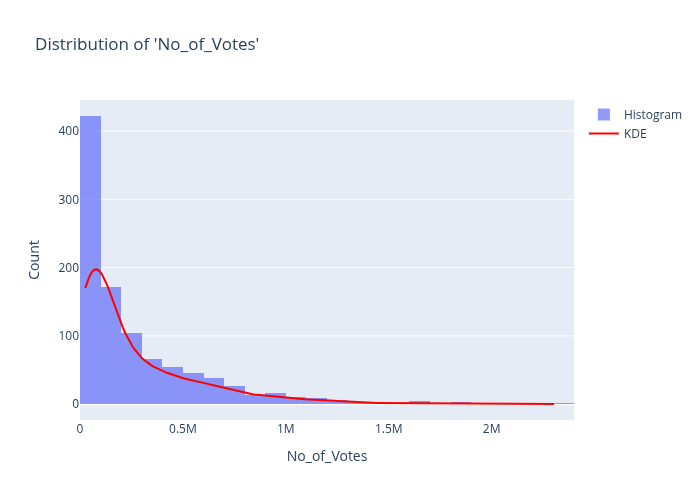

In [56]:
plot_distribution(df_transformed, 'No_of_Votes')

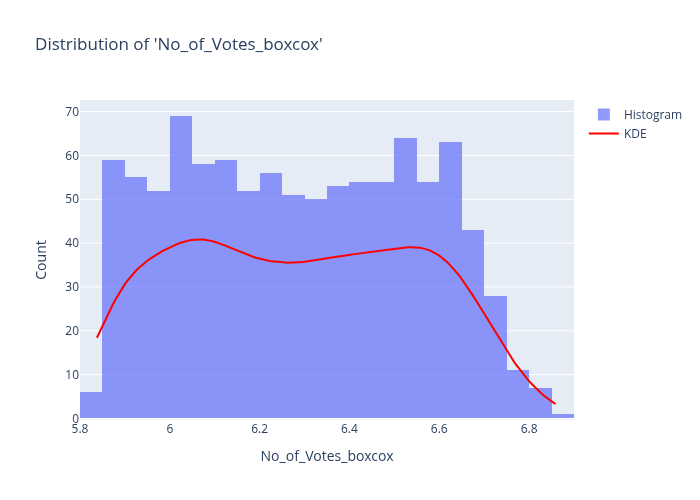

In [57]:
plot_distribution(df_transformed, 'No_of_Votes_boxcox')

In [ ]:

# Features e target
target = "IMDB_Rating"
numeric_features = ["Released_Year", "Runtime", "Meta_score", "No_of_Votes", "Gross"]
categorical_features = ["Certificate", "Genre", "Director"]

X = df_transformed.copy()[numeric_features + categorical_features]
y = df_transformed.copy()[target]

#  Pipelines de pré-processamento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", min_frequency=10))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Modelos a comparar
models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "GradientBoost": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "LassoCV": LassoCV(cv=5),
    "RidgeCV": RidgeCV(alphas=[0.1, 1, 10], cv=5)
}

#  Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Avaliação CV
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    mae_cv_mean = -scores.mean()
    mae_cv_std = scores.std()
    
    # Treino e teste
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE_CV_mean": mae_cv_mean,
        "MAE_CV_std": mae_cv_std,
        "MAE_test": mae_test,
        "R2_test": r2_test,
        "Pipeline": pipe
    })
    
    print(f"{name:15s} | CV MAE: {mae_cv_mean:.3f} ± {mae_cv_std:.3f} | "
          f"Test MAE: {mae_test:.3f}, R²: {r2_test:.3f}")

# 🔹 Selecionar melhor modelo pelo MAE médio da CV
best_model = min(results, key=lambda x: x["MAE_CV_mean"])
print(f"\nMelhor modelo: {best_model['Model']} | CV MAE: {best_model['MAE_CV_mean']:.3f}")

# 🔹 Salvar pipeline final
os.makedirs('src/models', exist_ok=True)
with open("src/models/pipeline_final.pkl", "wb") as f:
    pickle.dump(best_model["Pipeline"], f)

print("Pipeline final salvo em src/models/pipeline_final.pkl")


RandomForest    | CV MAE: 0.222 ± 0.112 | Test MAE: 0.151, R²: 0.422
GradientBoost   | CV MAE: 0.215 ± 0.095 | Test MAE: 0.156, R²: 0.399
LassoCV         | CV MAE: 0.253 ± 0.137 | Test MAE: 0.194, R²: 0.141
RidgeCV         | CV MAE: 0.252 ± 0.133 | Test MAE: 0.194, R²: 0.136

Melhor modelo: GradientBoost | CV MAE: 0.215
Pipeline final salvo em src/models/pipeline_final.pkl


### Fazendo uma previsão Resposta Entrega 4

In [ ]:
# --- Novo filme ---
novo_filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

df_novo = pd.DataFrame([novo_filme])

df_novo_2  = (preprocessor_0.transform(df_novo))
# #Pendente: Falta ajustar o pipeline para aceitar informações cruas, iguais ao CSV original.
# --- Previsão com pipeline final ---
with open("src/models/pipeline_final.pkl", "rb") as f:
    pipeline_final = pickle.load(f)

y_pred = pipeline_final.predict(df_novo_2)
print(f"Previsão de IMDB Rating: {y_pred[0]:.2f}")

# Observação: Melhorias necessárias! O tempo estourou. Preciso corrigir o pipeline_0 -> preprocess_0, que já está funcionando; o pipeline_1 ainda apresenta erros."

Previsão de IMDB Rating: 8.97
